# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
ford_df = pd.read_csv('201902-fordgobike-tripdata.csv', sep=',')
ford_df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
print("Shape of dataframe", ford_df.shape)
print("Dataframe Types", ford_df.dtypes)
print(ford_df.head(10))

Shape of dataframe (183412, 16)
Dataframe Types duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-0

In [4]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
ford_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


From the above, columns like `duration_sec` and  `member_birth_year` have outliers that we may want to look at. Also, it may be worthwile to check that there are no duplicates in the bike_id column.

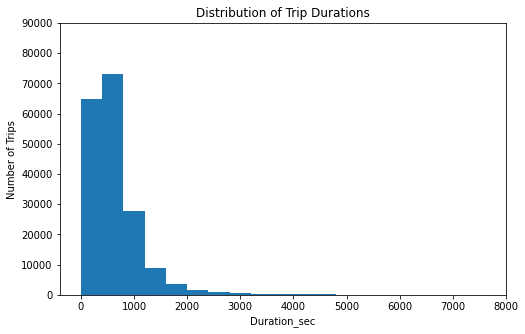

In [6]:
# Checking distribution of duration_sec.
binsize = 400
bins = np.arange(0, ford_df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford_df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.axis([-400, 8000, 0, 90000])
plt.show()


Most of the trips fall under the 2000 seconds mark, with a peak at 500 - 600 seconds. Removing the outliers in this column may cause some data quality issues, so they will be left alone.

/Users/chinomnso/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


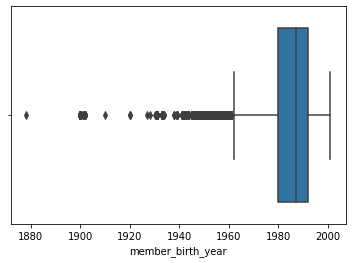

In [7]:
# Check for outliers in birth year column 
sb.boxplot(ford_df['member_birth_year']);

Outliers from 1880 till 1922 suggest that people older than 100 years old were cycling. This is strange. Further exploration of this column will be done to understand the outliers.

In [8]:
# Further exploring outliers in the member_birth_year column
older_than_100 = len(ford_df[ford_df['member_birth_year']<1922])
older_than_100_percent = older_than_100/len(ford_df)
print (f'People who were born before 1922 represent {(older_than_100_percent*100):.2f} % of the sample population')
print(f'There are {(older_than_100):} people over 100 years old')

People who were born before 1922 represent 0.04 % of the sample population
There are 75 people over 100 years old


We can definitely remove these ones as it is less likely that people older than 100 years old were cycling.

In [9]:
ford_df = ford_df.drop_duplicates()
ford_df.shape

(183412, 16)

There are no duplicates in the dataset

In [10]:
# Check for unique values in qualitative data columns
qualitative_cols = ['member_gender', 'bike_share_for_all_trip', 'user_type']
for col in qualitative_cols : 
    print (ford_df[col].unique())

['Male' nan 'Other' 'Female']
['No' 'Yes']
['Customer' 'Subscriber']


### What is the structure of your dataset?

> - The shape of the dataframe is `(183412, 16)`, but some columns such as the `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `member_birth_year` and `member_gender` have null values.


### What is/are the main feature(s) of interest in your dataset?

> - `duration_sec`, the `longitudes` and `latitudes` columns 
> - `member_birth-year`
> - `bike_id`

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - I also would like to see the distribution across age and gender.
> - I'm keen on exploring the outliers in `duration_sec` and `member_birth_year`.

### The Questions
> - What is the distribution of age, gender and bike_id in the dataset?
> - How much distance was covered and at what speed the bikers cycled?
> - What is the distribution of `duration_sec` across the bikers ages?


## Data Cleaning and Wrangling
### To do
- Create `age` column.
- Start and end datetime columns need to be changed to datetime type.
- Create a distance column from the longitude and latitude columns.
- Delete rows without gender and birth year.
- Remove Age outliers i.e., people born before 1922.
- Drop columns not relevant to the analysis

In [11]:
# change the data type for start and end time to be datetime64[ns] 
ford_df.start_time = pd.to_datetime(ford_df.start_time)
ford_df.end_time = pd.to_datetime(ford_df.end_time)

In [12]:
ford_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [13]:
# Remove outliers in birth year column 
elderly_id = ford_df[ford_df['member_birth_year']<1922].index
ford_df = ford_df.drop(index=elderly_id)
ford_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183337.000000,183140.000000,183337.000000,183337.000000,183140.000000,183337.000000,183337.000000,183337.000000,175072.000000
mean,726.109656,138.569499,37.771210,-122.352663,136.248635,37.771414,-122.352250,4472.851274,1984.842333
std,1794.731673,111.767356,0.099598,0.117111,111.512847,0.099507,0.116689,1664.403961,9.968551
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1927.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4957.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [14]:
# Create age column 
ford_df['age'] = 2022 - ford_df['member_birth_year']
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183337 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183337 non-null  int64         
 1   start_time               183337 non-null  datetime64[ns]
 2   end_time                 183337 non-null  datetime64[ns]
 3   start_station_id         183140 non-null  float64       
 4   start_station_name       183140 non-null  object        
 5   start_station_latitude   183337 non-null  float64       
 6   start_station_longitude  183337 non-null  float64       
 7   end_station_id           183140 non-null  float64       
 8   end_station_name         183140 non-null  object        
 9   end_station_latitude     183337 non-null  float64       
 10  end_station_longitude    183337 non-null  float64       
 11  bike_id                  183337 non-null  int64         
 12  user_type       

In [15]:
ford_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age'],
      dtype='object')

In [16]:
# Create a distance column from the longitude and latitude columns

def calculate_distance_km(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    longitude_difference = lon2 - lon1
    latitude_difference = lat2 - lat1

    a = np.sin(latitude_difference/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(longitude_difference/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [17]:
ford_df['distance_km'] = calculate_distance_km(ford_df['start_station_latitude'],ford_df['start_station_longitude'],ford_df['end_station_latitude'],ford_df['end_station_longitude'])
ford_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,distance_km
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,38.0,0.544367
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN,1.741905
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,50.0,2.702847
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,33.0,0.260575
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,48.0,2.407789


In [18]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183337 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183337 non-null  int64         
 1   start_time               183337 non-null  datetime64[ns]
 2   end_time                 183337 non-null  datetime64[ns]
 3   start_station_id         183140 non-null  float64       
 4   start_station_name       183140 non-null  object        
 5   start_station_latitude   183337 non-null  float64       
 6   start_station_longitude  183337 non-null  float64       
 7   end_station_id           183140 non-null  float64       
 8   end_station_name         183140 non-null  object        
 9   end_station_latitude     183337 non-null  float64       
 10  end_station_longitude    183337 non-null  float64       
 11  bike_id                  183337 non-null  int64         
 12  user_type       

In [19]:
ford_df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,distance_km
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,38.0,0.544367
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN,1.741905
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,50.0,2.702847


In [20]:
# create new column (day of week, day, hour)
ford_df['start_day_of_week'] = ford_df['start_time'].dt.day_name()
ford_df['start_hour'] = ford_df['start_time'].dt.hour
ford_df['end_day_of_week'] = ford_df['end_time'].dt.day_name()
ford_df['end_hour'] = ford_df['end_time'].dt.hour
ford_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,distance_km,start_day_of_week,start_hour,end_day_of_week,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,38.0,0.544367,Thursday,17,Friday,8
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,NaN,1.741905,Thursday,18,Friday,6
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,50.0,2.702847,Thursday,12,Friday,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,33.0,0.260575,Thursday,17,Friday,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,48.0,2.407789,Thursday,23,Friday,0


In [22]:
# Drop columns not relevant to the analysis
columns_to_be_deleted = ['start_time', 'end_time',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_name',
       'end_station_latitude', 'end_station_longitude',
       'member_birth_year', 'bike_share_for_all_trip' ]

ford_df = ford_df.drop(columns= columns_to_be_deleted, axis=1)

In [24]:
# Remove all missing values 
ford_df = ford_df.dropna()

In [25]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174877 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   duration_sec       174877 non-null  int64  
 1   start_station_id   174877 non-null  float64
 2   end_station_id     174877 non-null  float64
 3   bike_id            174877 non-null  int64  
 4   user_type          174877 non-null  object 
 5   member_gender      174877 non-null  object 
 6   age                174877 non-null  float64
 7   distance_km        174877 non-null  float64
 8   start_day_of_week  174877 non-null  object 
 9   start_hour         174877 non-null  int64  
 10  end_day_of_week    174877 non-null  object 
 11  end_hour           174877 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 17.3+ MB


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

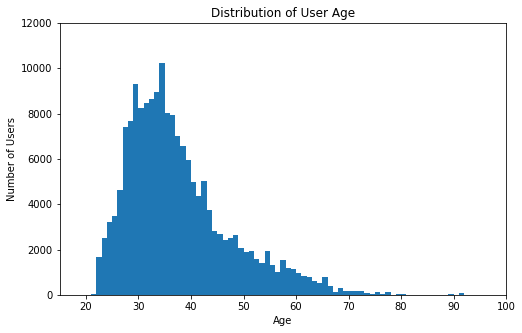

In [27]:
# Lets start with the distribution of age.


binsize = 1
bins = np.arange(0, ford_df['age'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford_df, x = 'age', bins = bins)
plt.axis([15, 100, 0, 12000])
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

We can see that most of the users are between 21 and 40 years old


### The Questions
> - What is the distribution of age, gender and bike_id in the dataset?
> - How much distance was covered and at what speed the bikers cycled?
> - What is the distribution of `duration_sec` across the bikers ages?


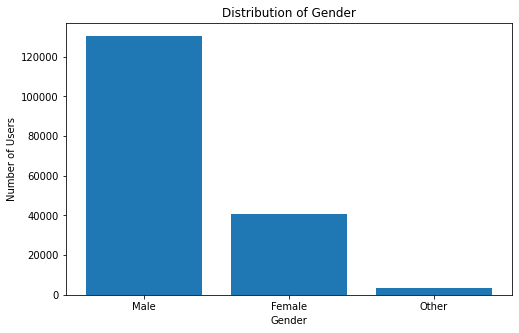

In [28]:
# What is the distribution of gender
# plotting types of users 
plt.figure(figsize=[8,5])
plt.bar(x = ford_df.member_gender.value_counts().keys(), height = ford_df.member_gender.value_counts() )
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [29]:
ford_df.columns

Index(['duration_sec', 'start_station_id', 'end_station_id', 'bike_id',
       'user_type', 'member_gender', 'age', 'distance_km', 'start_day_of_week',
       'start_hour', 'end_day_of_week', 'end_hour'],
      dtype='object')

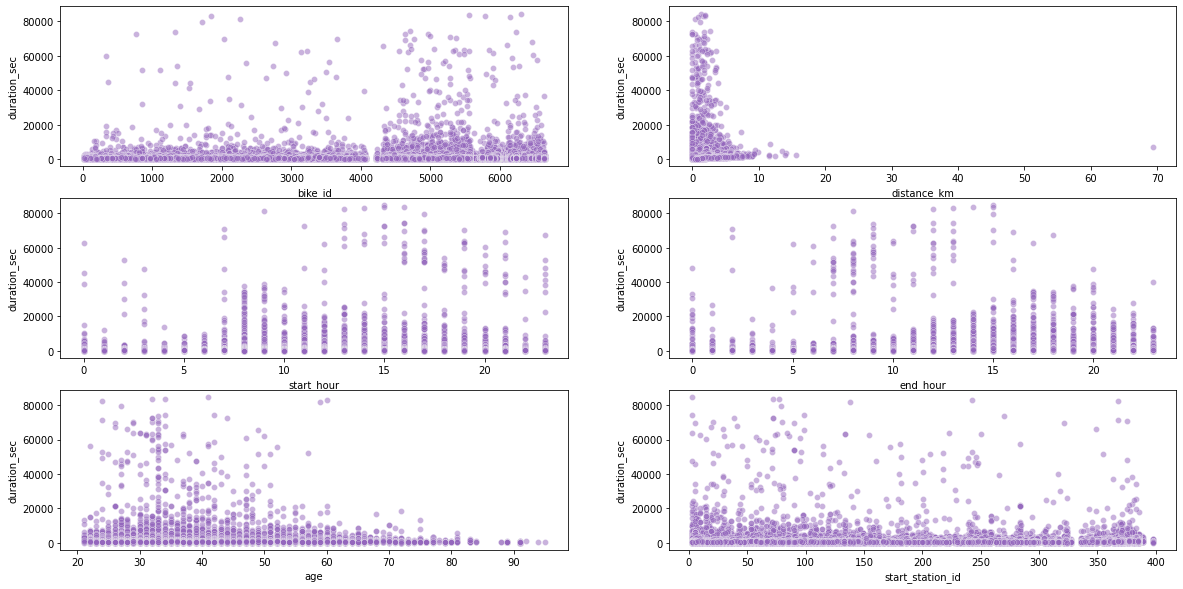

In [42]:
# Create Scatter plots to get relationship between quantitative variables and trip duration
quantitative_columns = ['bike_id', 'distance_km', 'start_hour', 'end_hour', 'age', 'start_station_id']
color = sb.color_palette()[4]
nrows, ncols = 3, 2
cols = quantitative_columns
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))
for i in range(nrows):
    for j in range(ncols): 
        sb.scatterplot(data=ford_df,y=ford_df['duration_sec'],x=ford_df[cols[i*ncols+j]],color=color, ax = ax[i,j],alpha=0.5)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



# References

Longitude and Latitude: https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas/29546836#29546836